# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/HR-Analytics-Project--Understanding-the-Attrition-in-HR/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df= df.drop_duplicates()

In [5]:
df.shape

(1470, 35)

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# We can see there no null values so we are good to proceed further!

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.nunique().to_frame("Unique values")

,Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
# EmployeeCount=All the data use to fill is same that is 1. so there would be no mean to have them in dataset 
# EmployerNumber=It is just a unique number given to employer that doesnot effect our target data
# Over18= All the data use to fill is same 
# StandardHours=Its also giving only single value for all our columns
# so we can drop these 4 columns

In [12]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [13]:
df.shape

(1470, 31)

In [14]:
# from the data description above describe transpose method it is displaying that there is no missing data 
# as every columns have same count 
# the columns like Monthlyincome, Totalworkingyears,YearsAtCompany,YearsinCurrentRole,YearSinceLastPromotion,YearWithCurrManager has huge differece in their 75 % and 100% 
# so they may have some amount of outlier that is need to be treated.

In [15]:
# no. of object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [16]:
# so there are 8 object type columns

In [17]:
# no. of integer data types:

integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes 

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
# so there are 23 integer type columns

In [19]:
# EDA and Visualization

In [20]:
# countplot for object types features

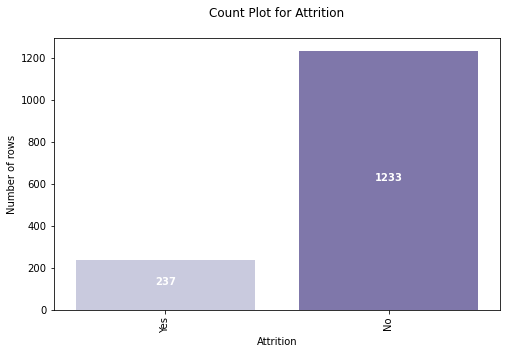

In [21]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

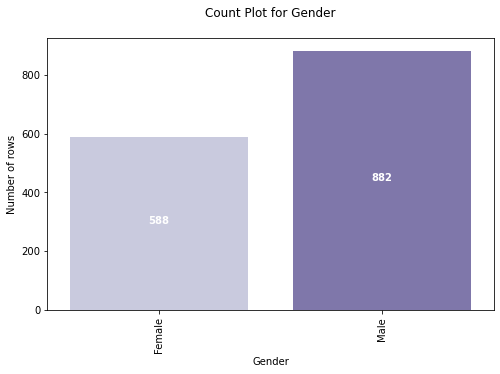

In [22]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

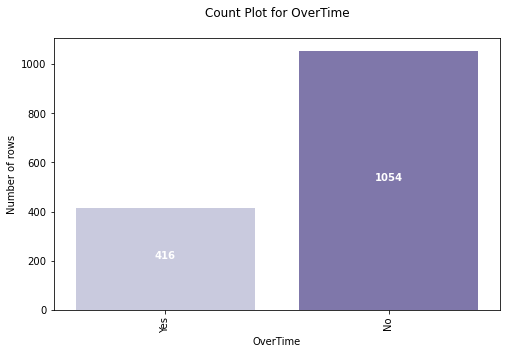

In [23]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

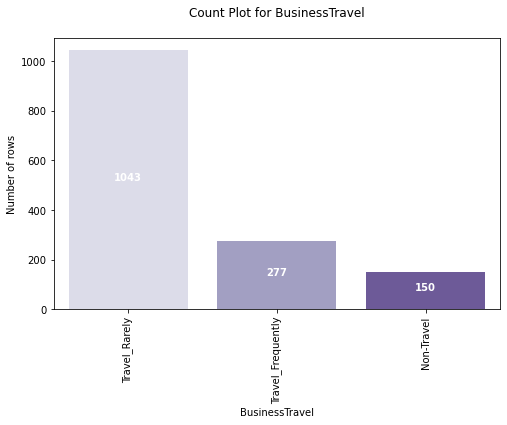

In [24]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

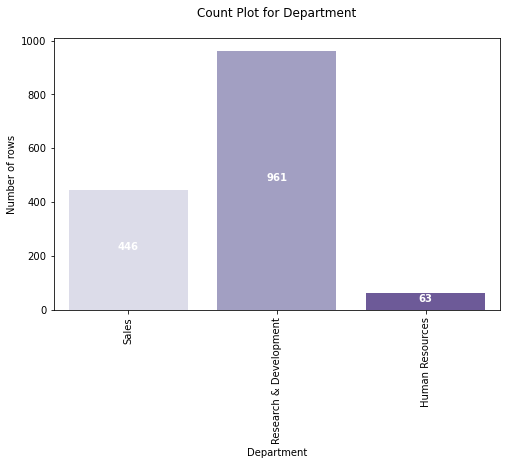

In [25]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

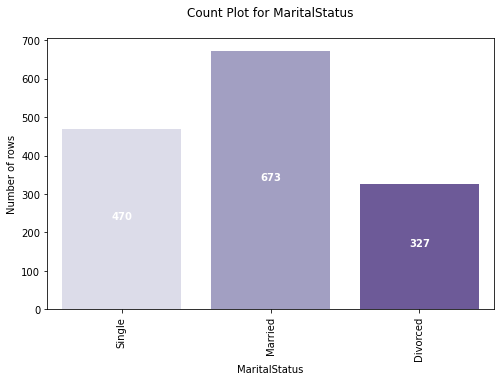

In [26]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

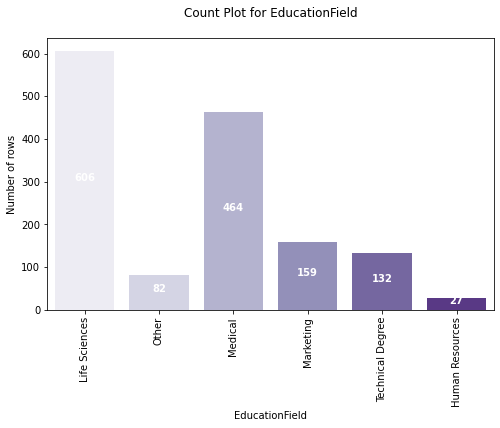

In [27]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

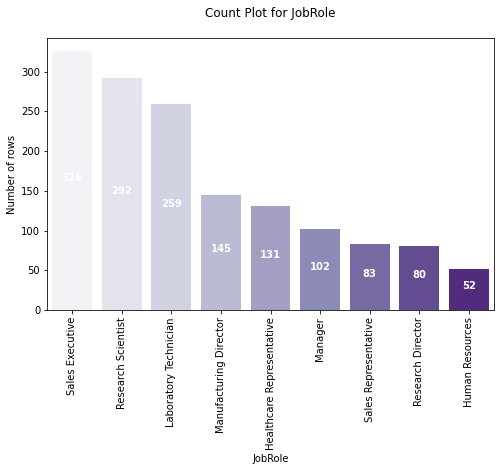

In [28]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [29]:
# distplot for integer type features

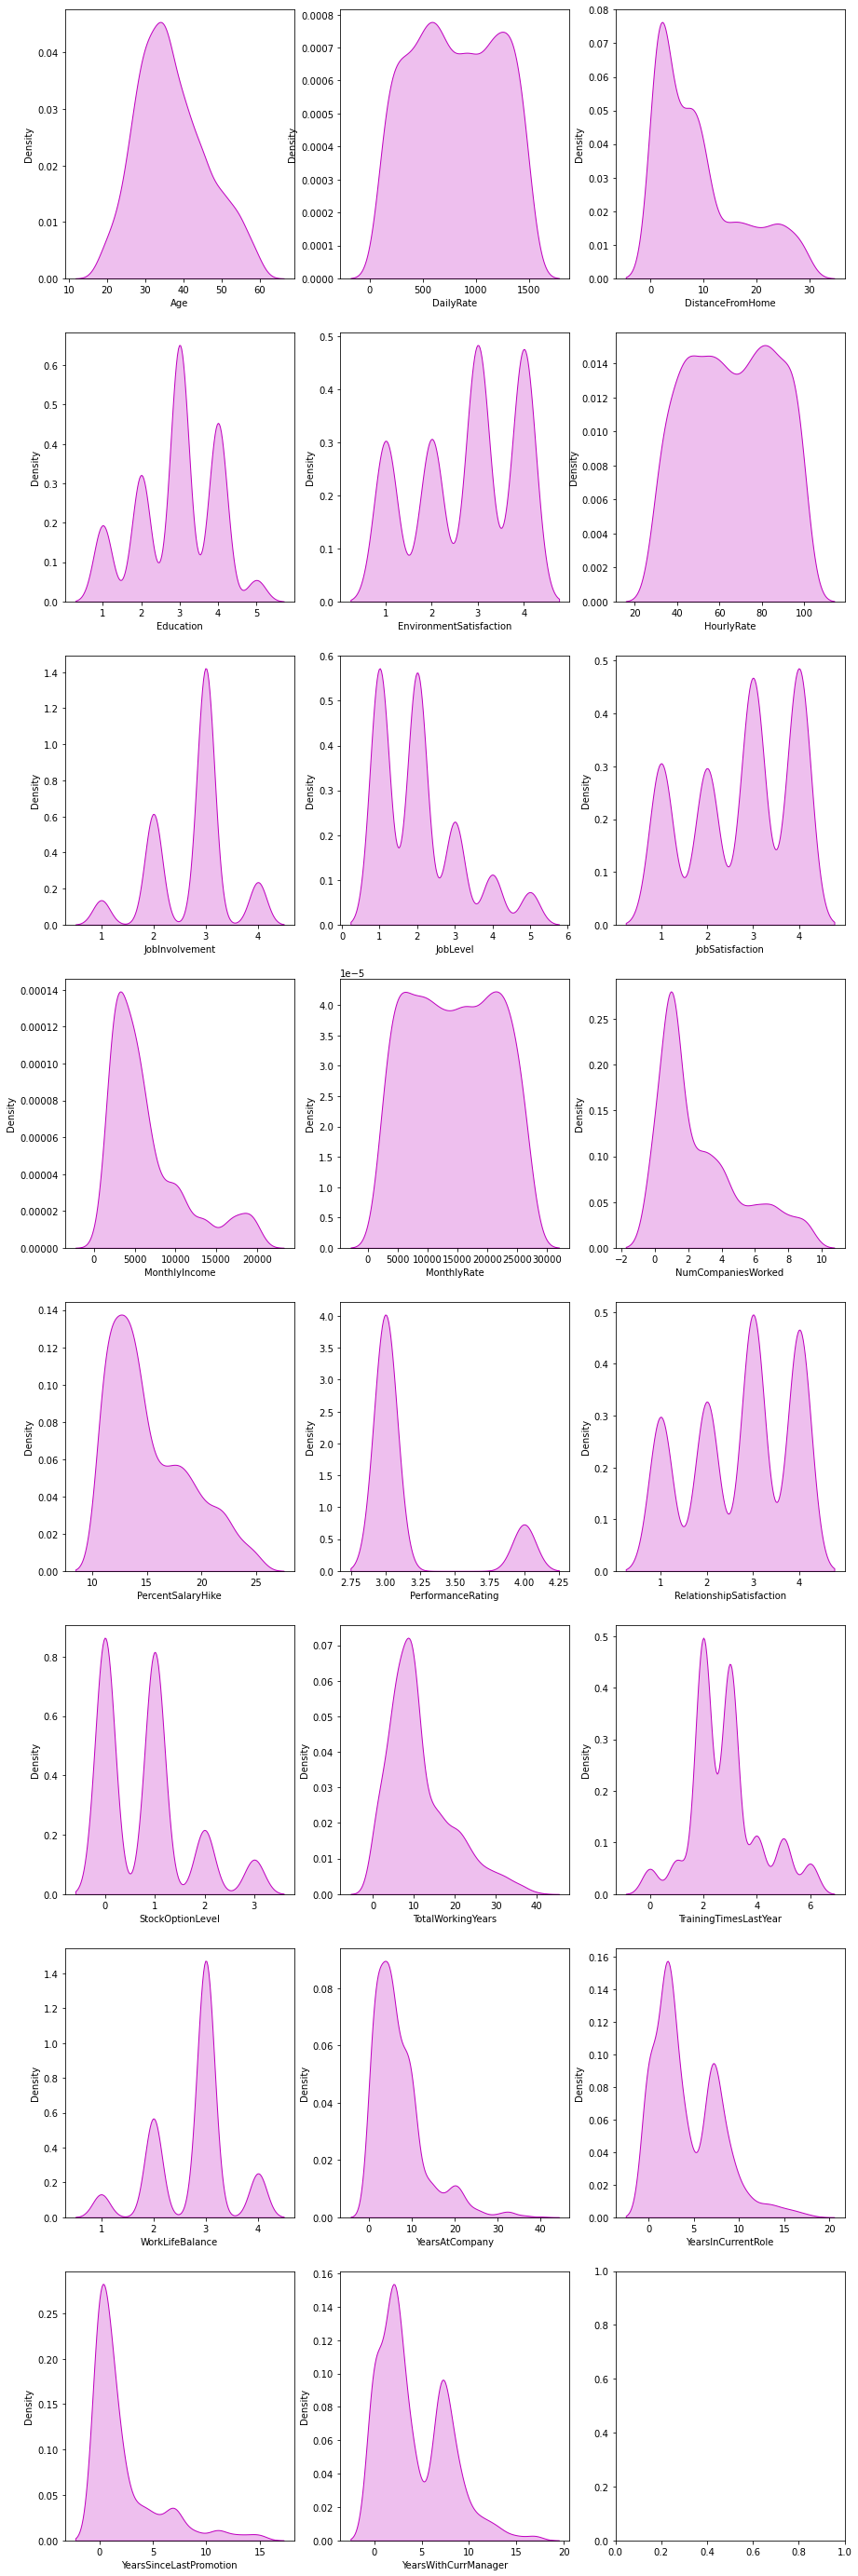

In [30]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

In [31]:
# from the above it is clear that there are some skewnesses in some of the graphs and they have to be rectified!

In [32]:
# to check the outliers let's check the boxplots first...

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

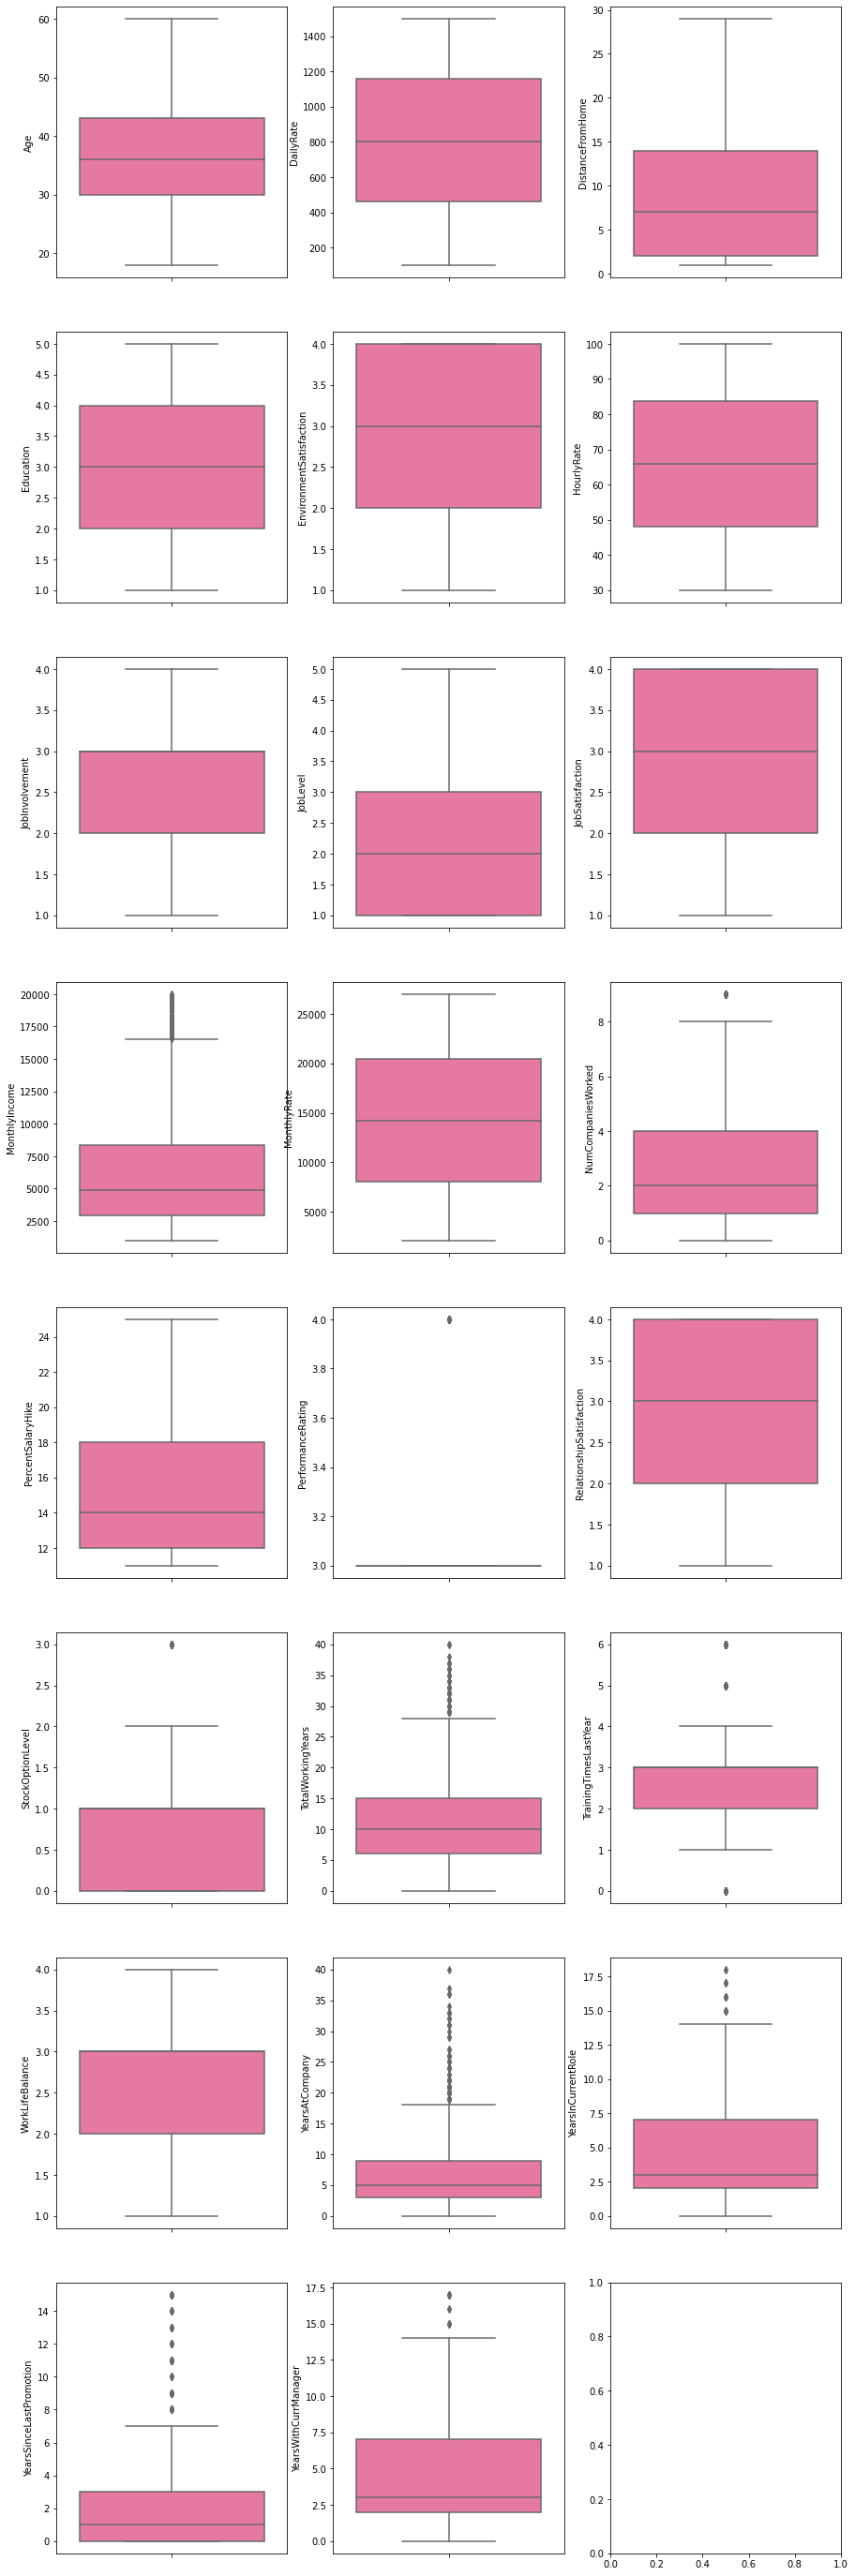

In [35]:
# Boxplot for the integer values 

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [36]:
# from above clearly mostly about 10 features have outliers!

In [37]:
# Encoding the object datatype columns

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [39]:
# target column was object datatype so it is converted into integer type.

In [40]:
# let us now convert the remaining 7 feature columns which are also object data type

from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()

df['BusinessTravel'] = oec.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oec.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oec.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oec.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oec.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oec.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oec.fit_transform(df['OverTime'].values.reshape(-1,1))

In [41]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [42]:
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [43]:
# we have successfully changed all the object type data into int or float type ones!

In [44]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
columns= ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

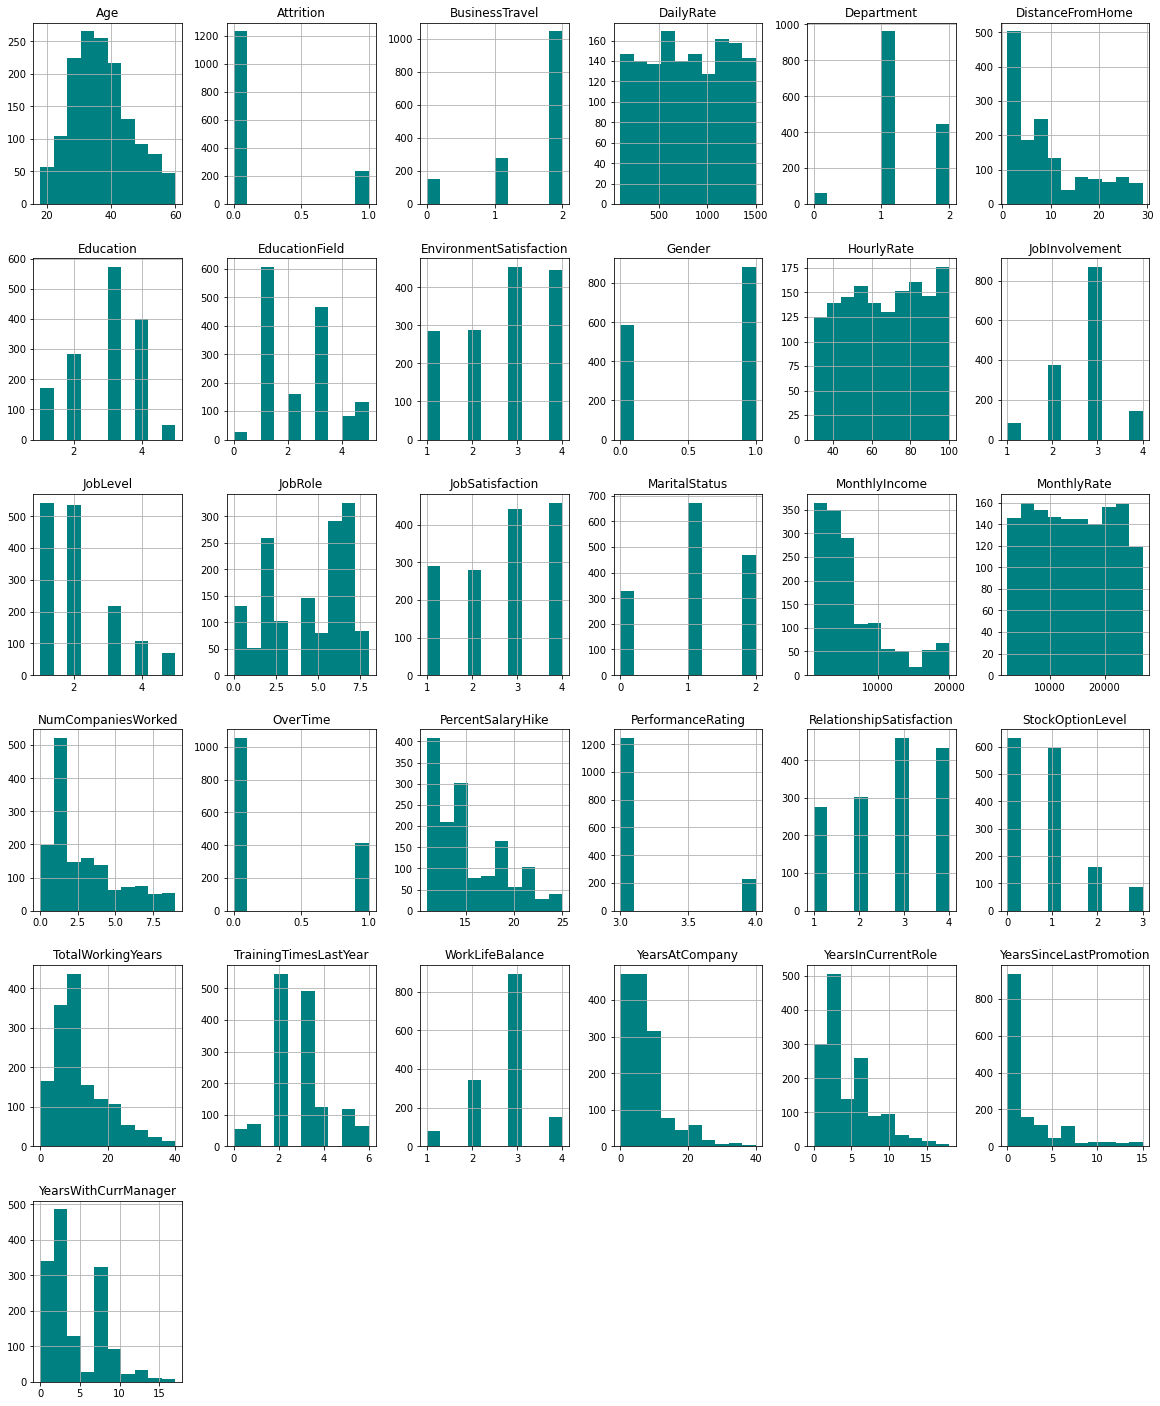

In [46]:
df.hist(figsize=(20,25), color= 'teal')
plt.show()

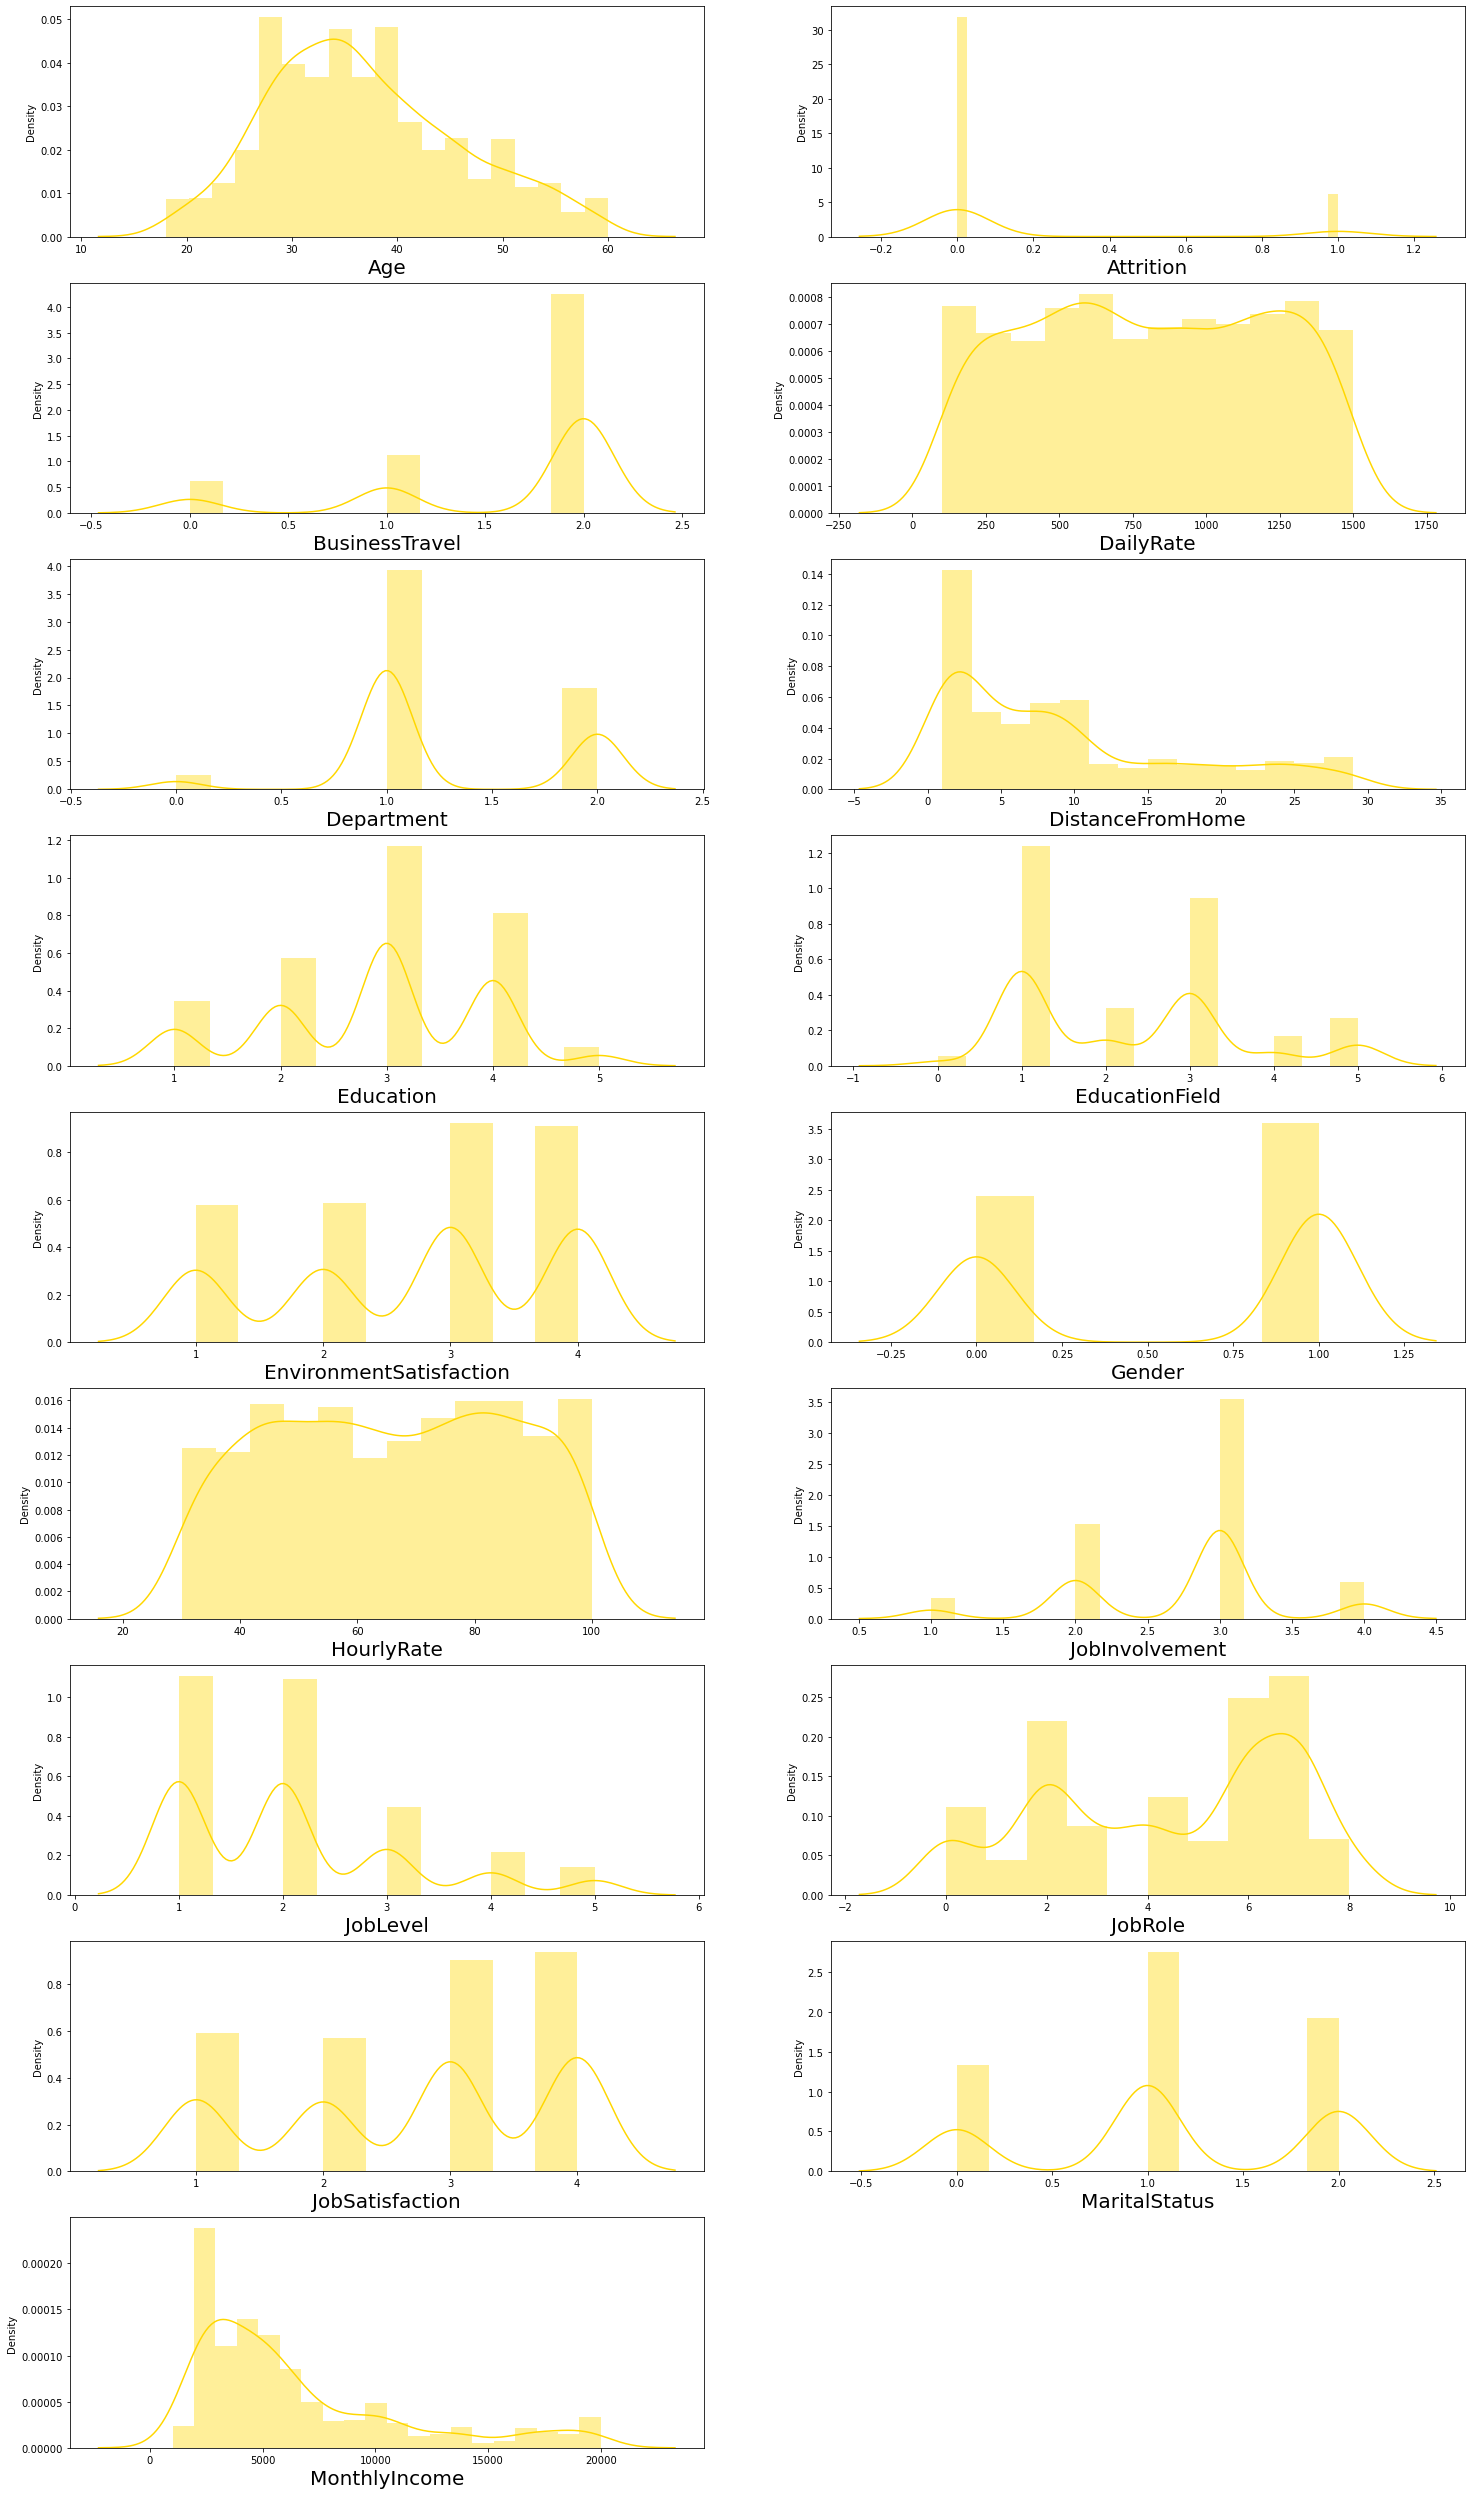

In [47]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'gold')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [48]:
# mostly normally distributed, but few has bit skewness!

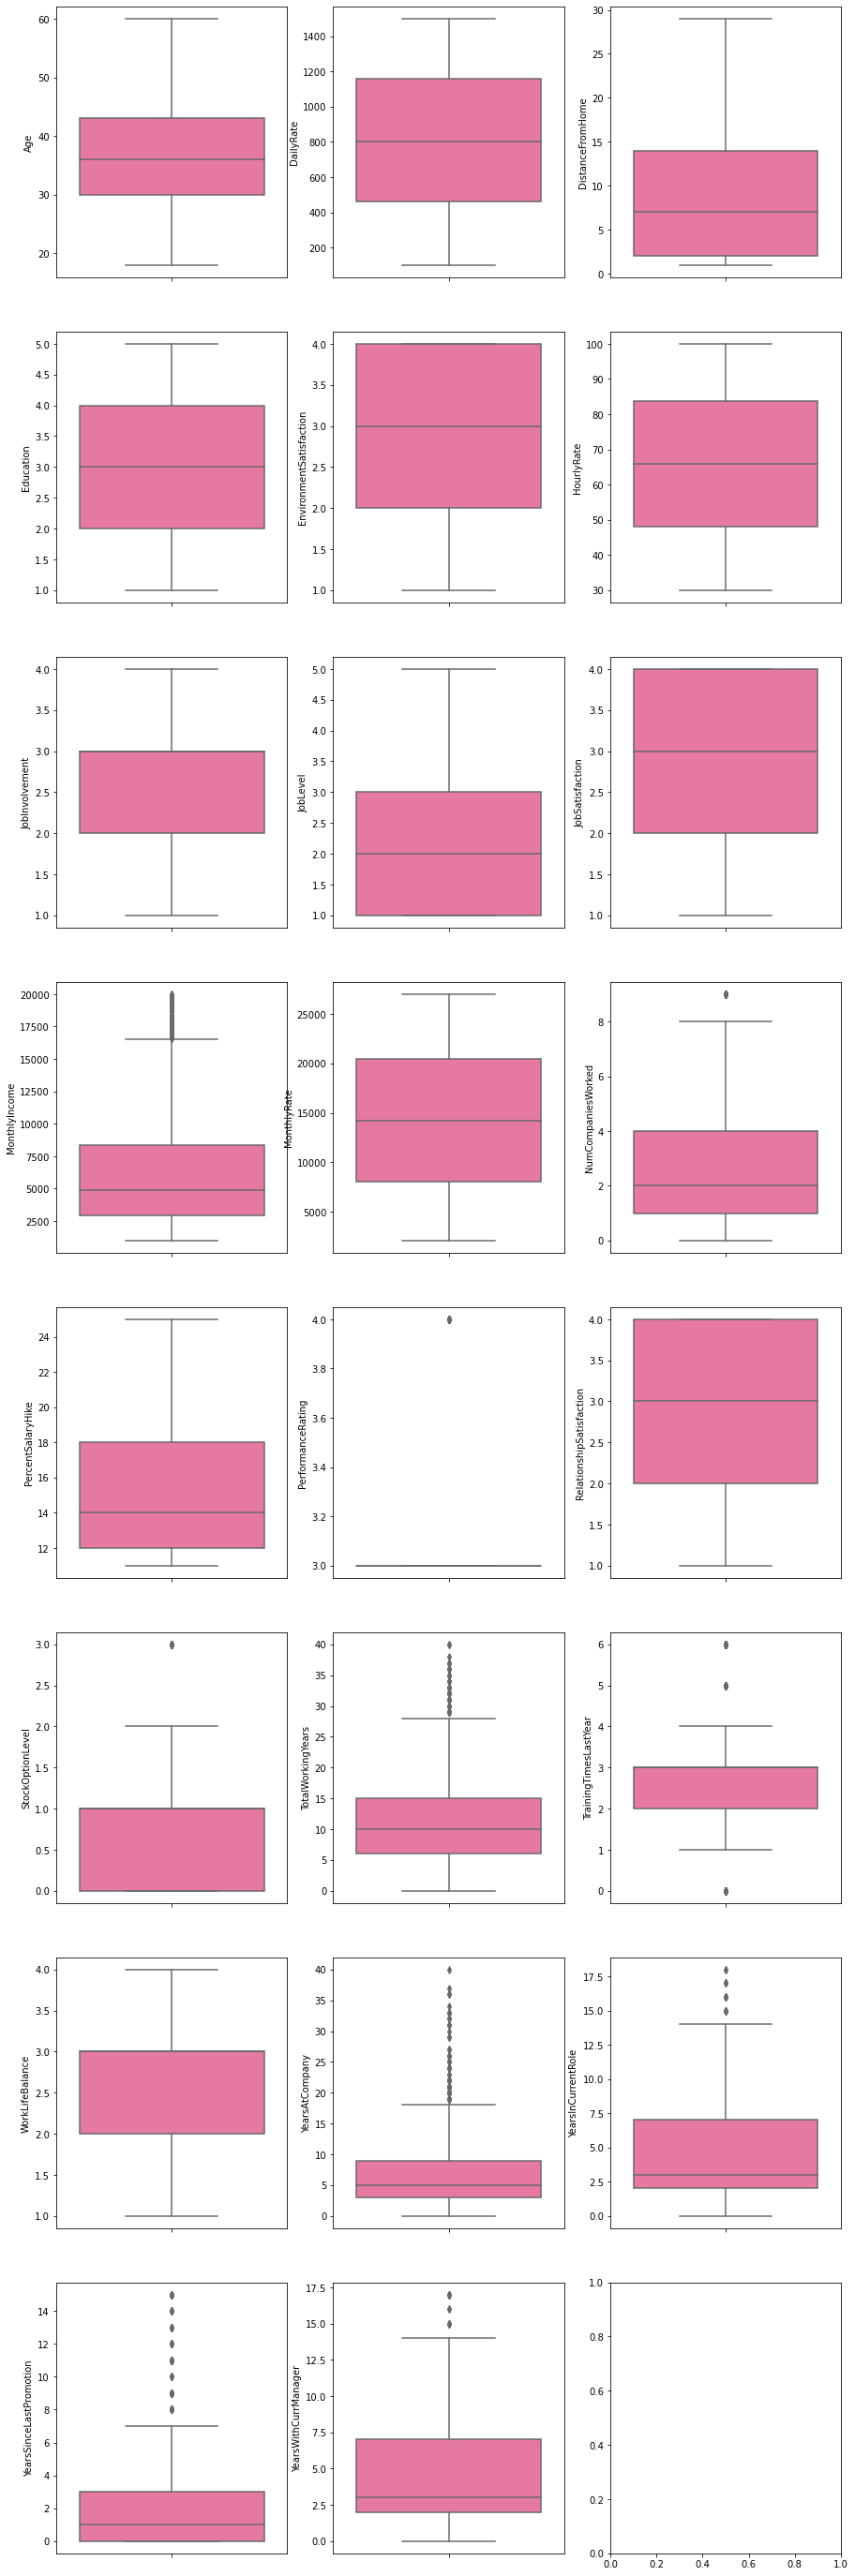

In [49]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [50]:
# 10 features has outliers

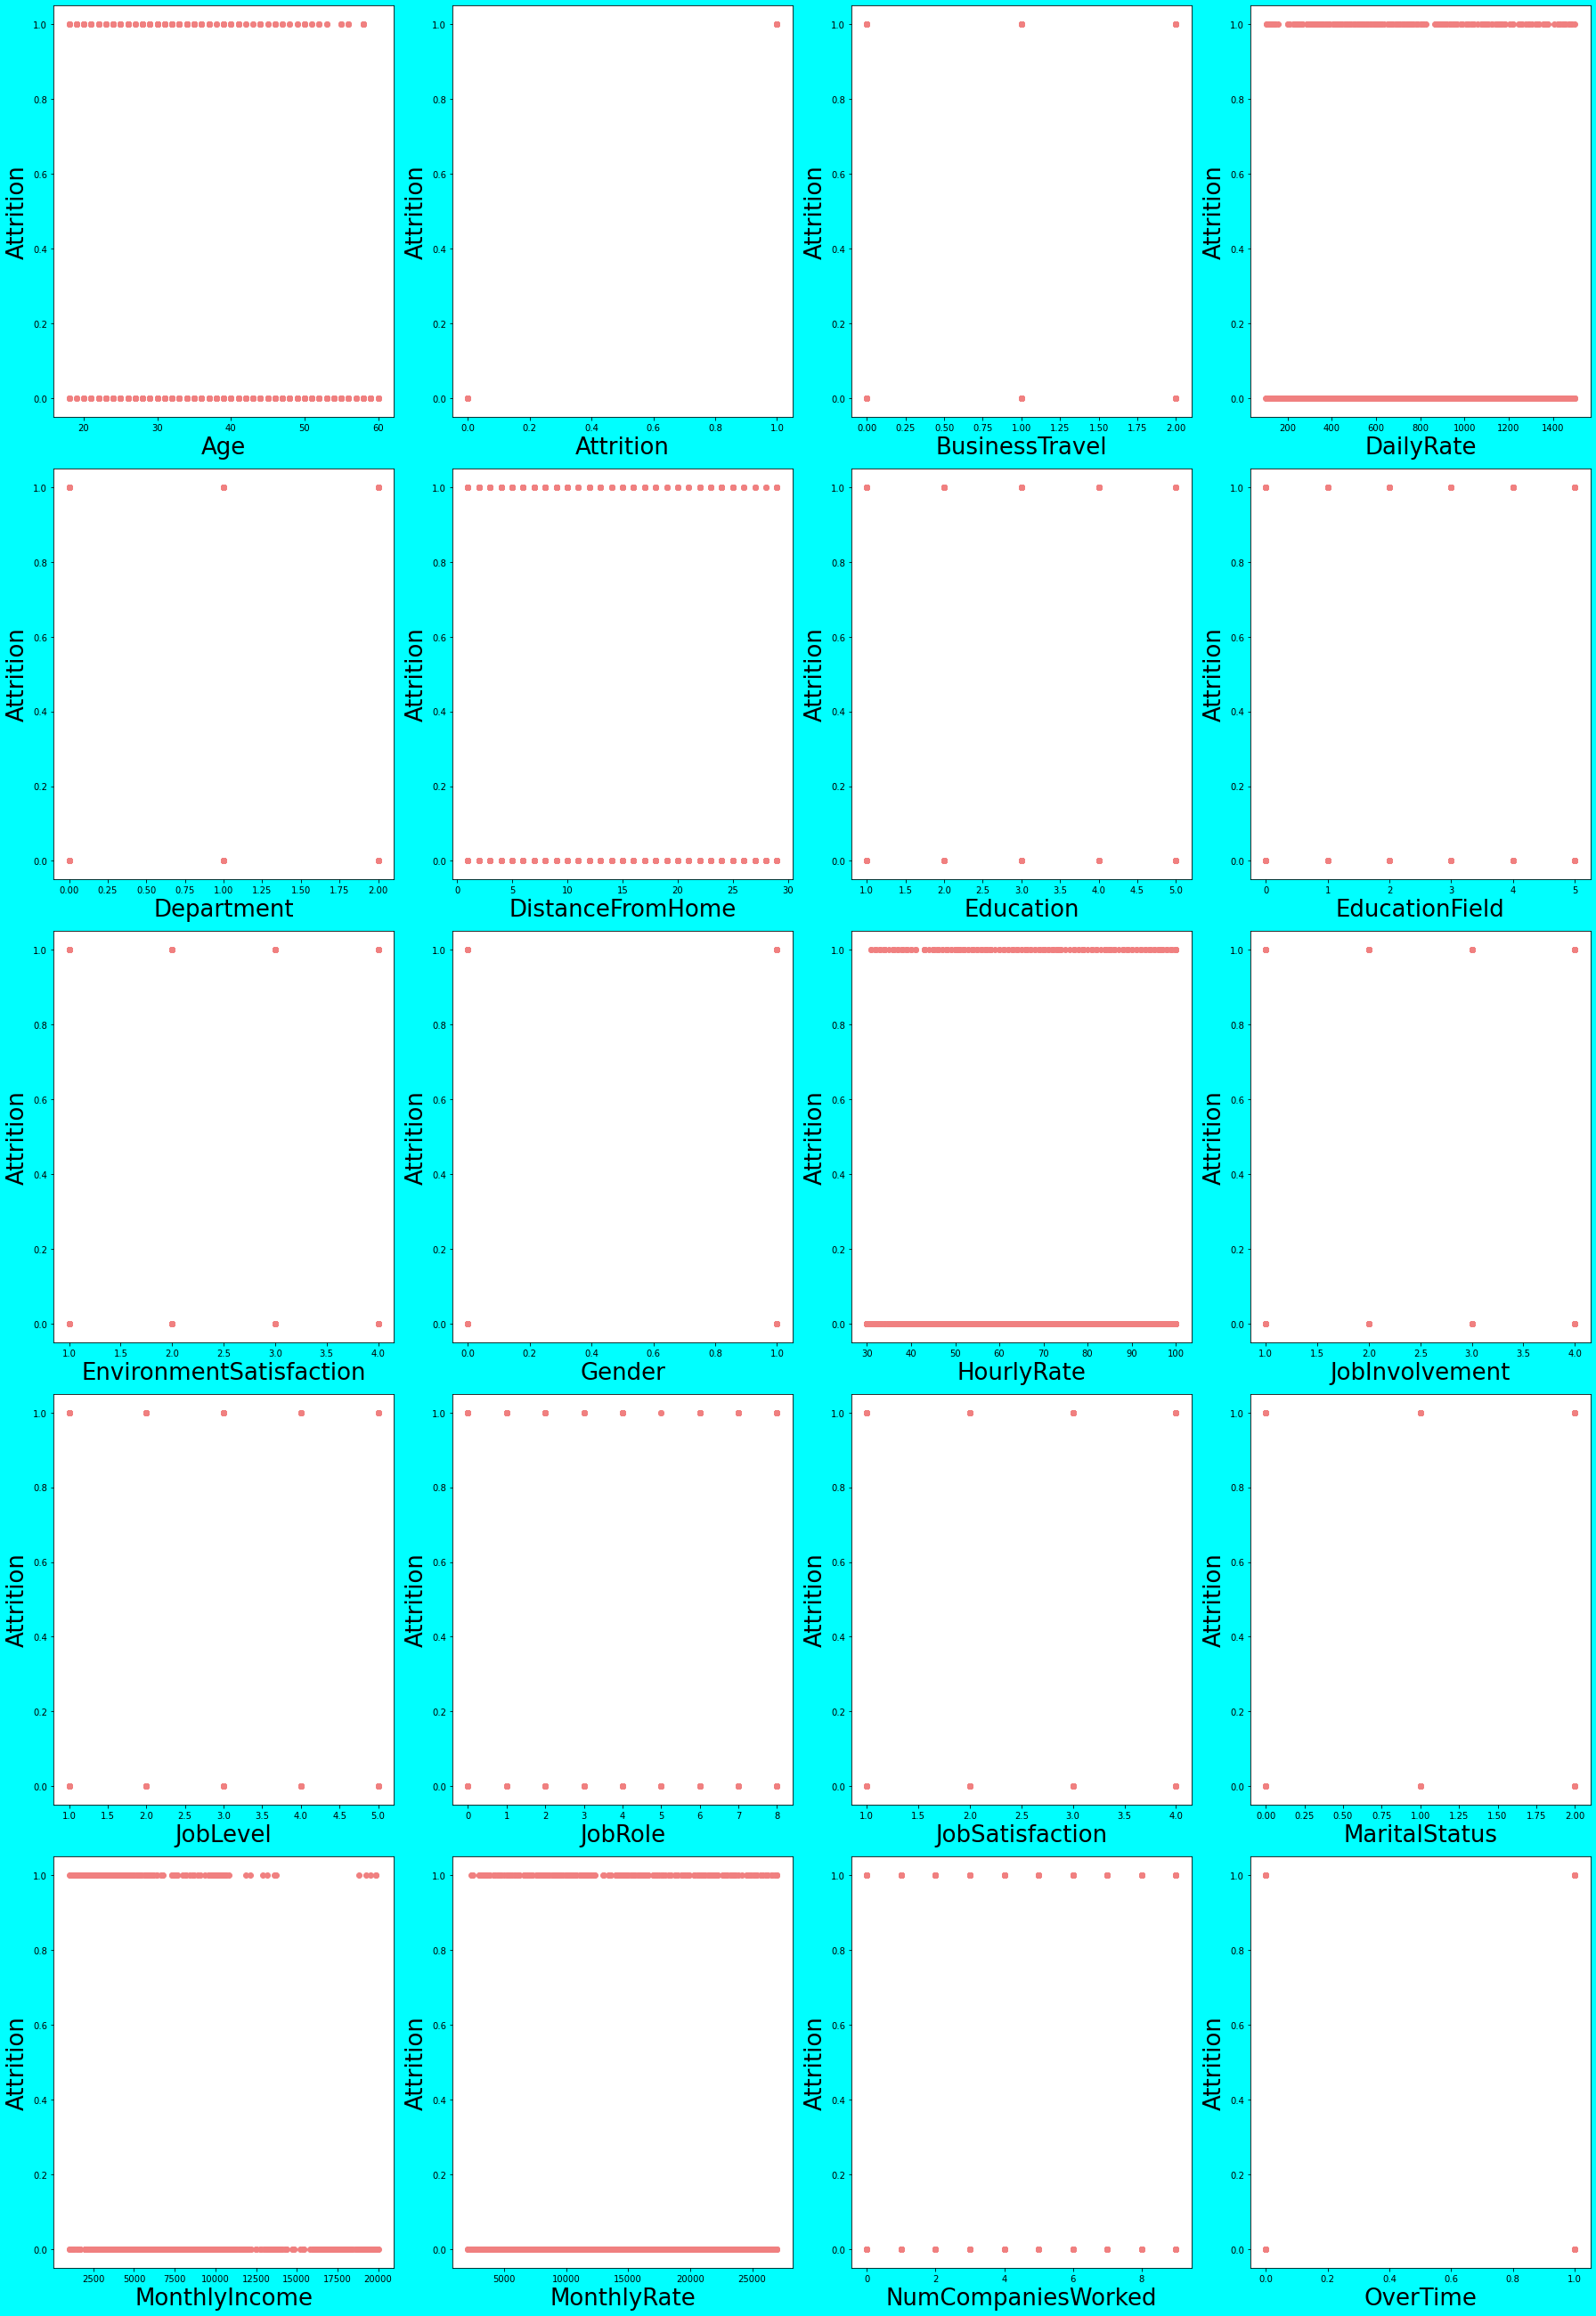

In [51]:
#Bivariate Analysis

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['Attrition'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Attrition', fontsize=26)
    plotnumber += 1
plt.tight_layout()

In [52]:
# not very clear conclusion can be drawn from above

<Figure size 1800x1440 with 0 Axes>

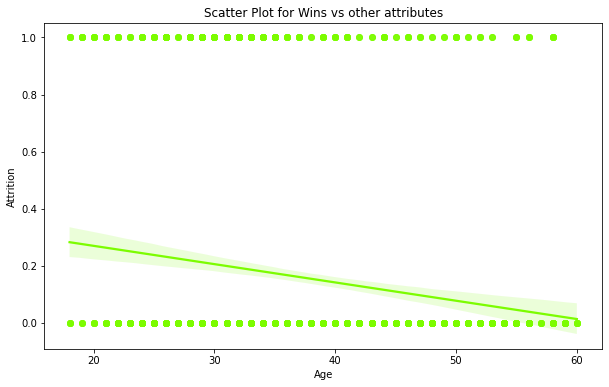

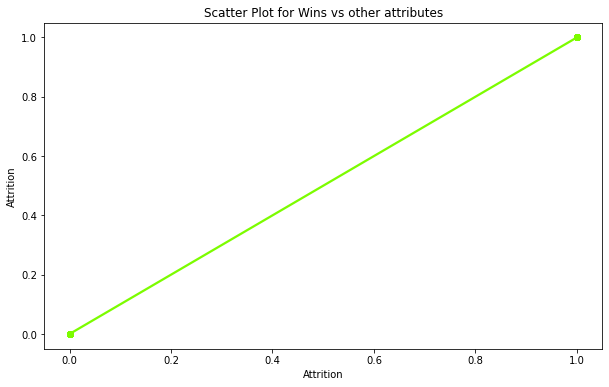

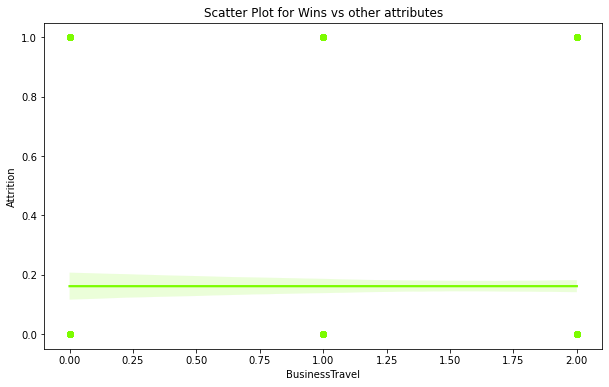

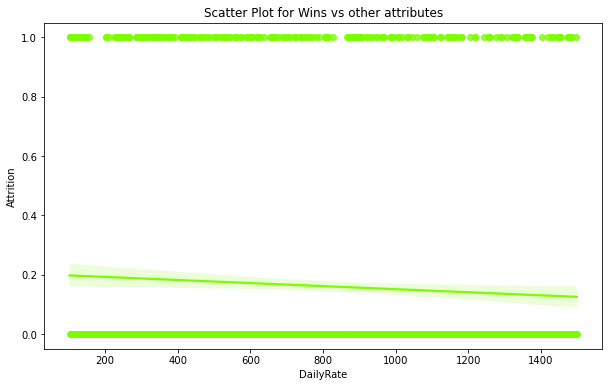

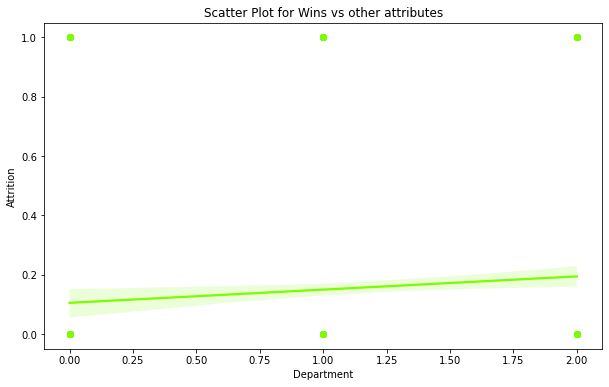

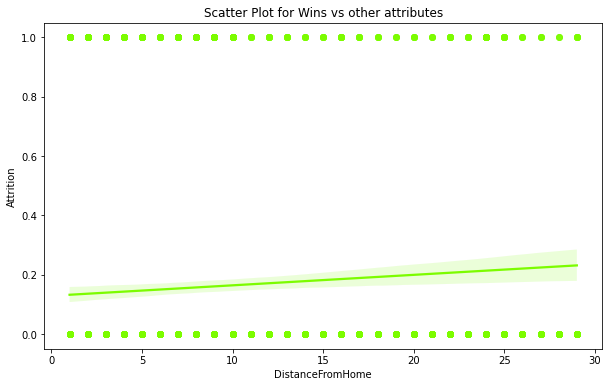

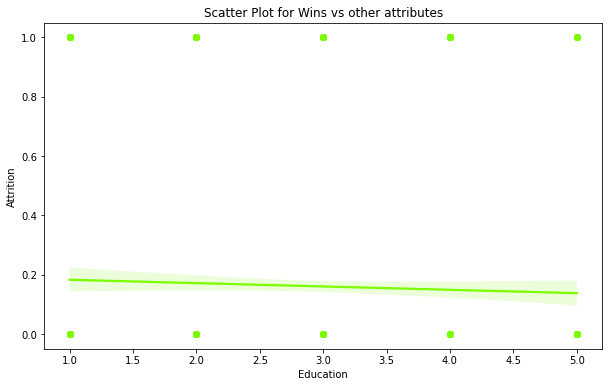

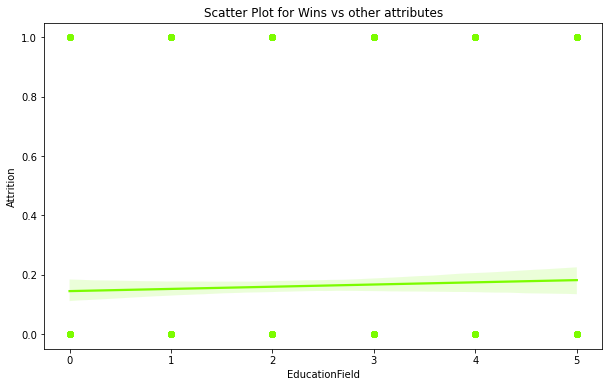

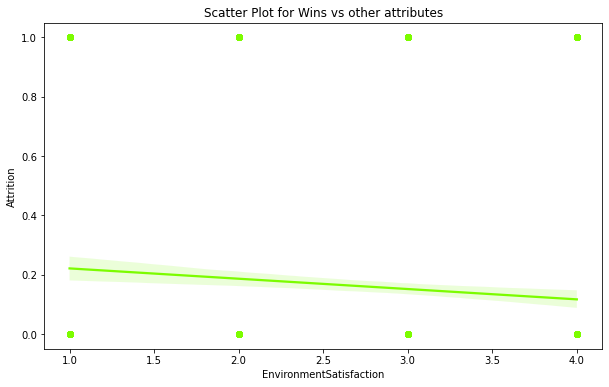

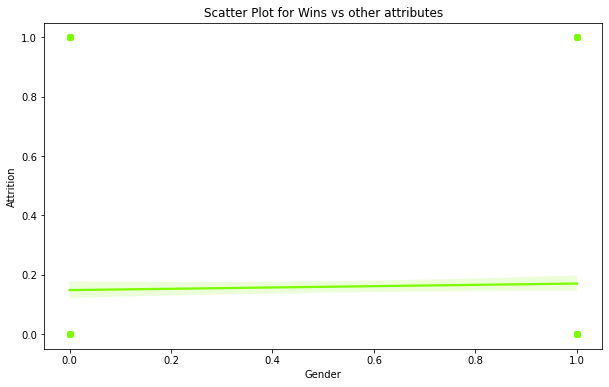

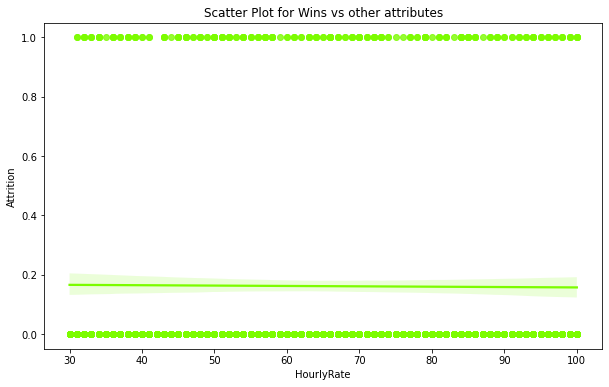

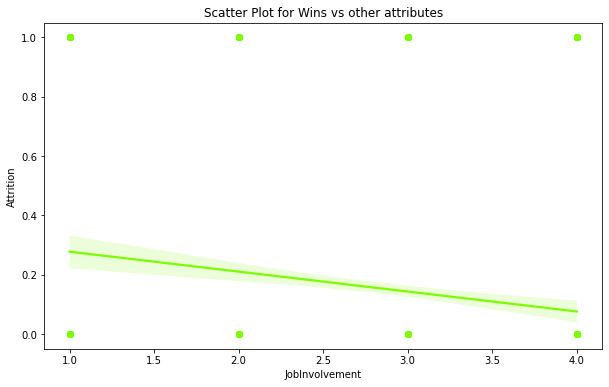

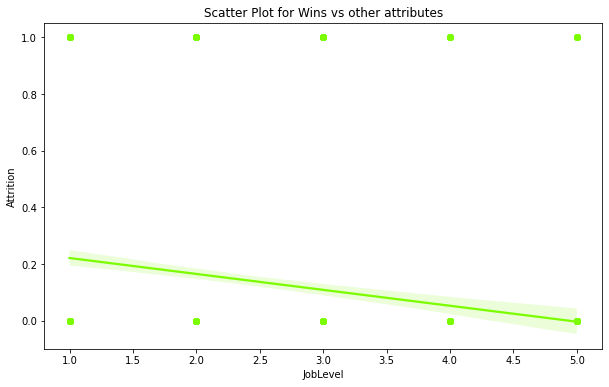

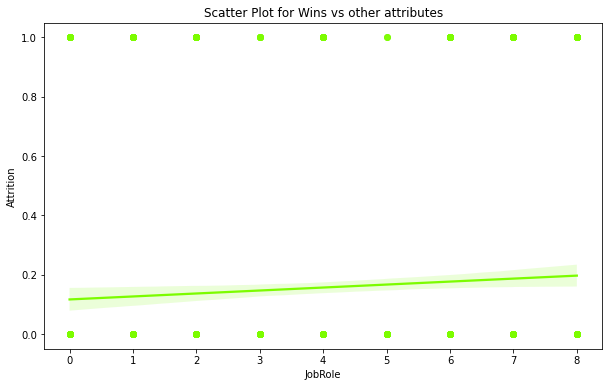

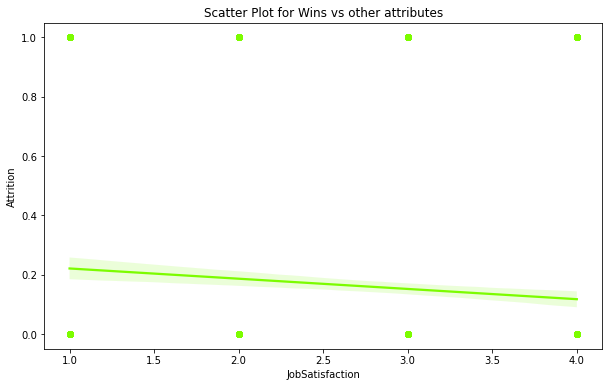

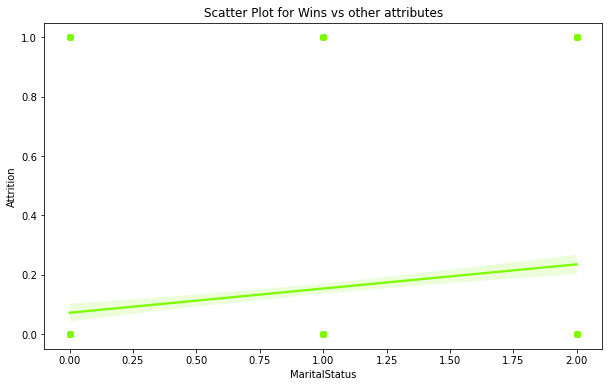

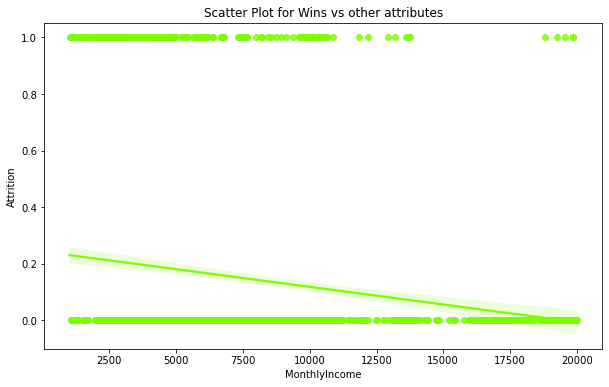

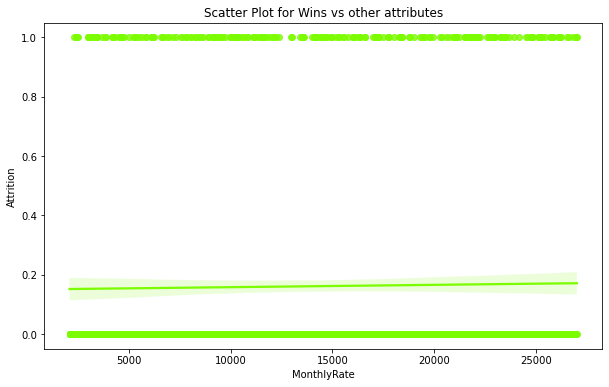

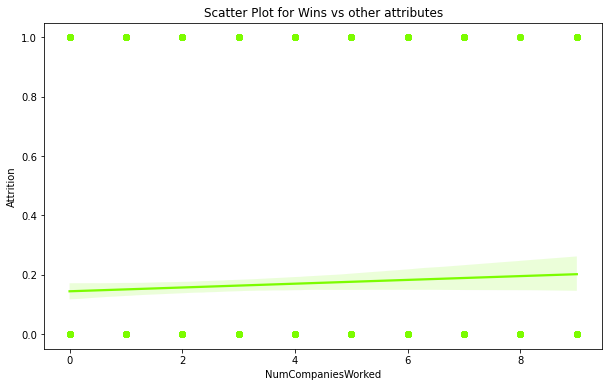

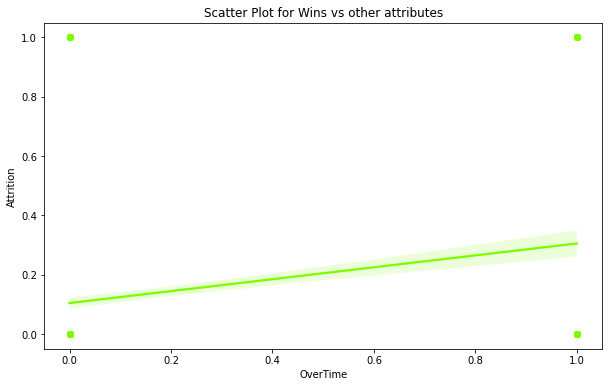

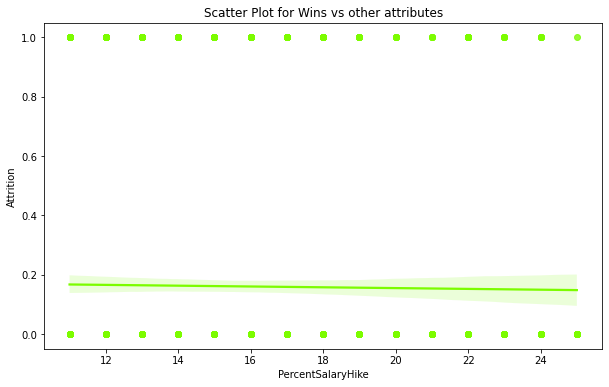

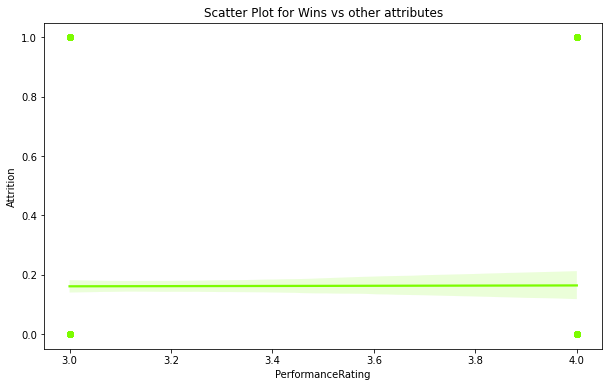

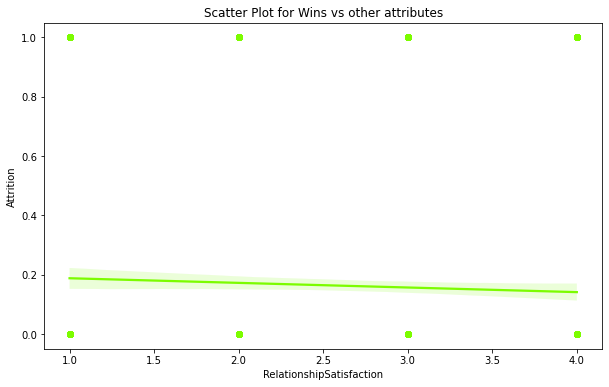

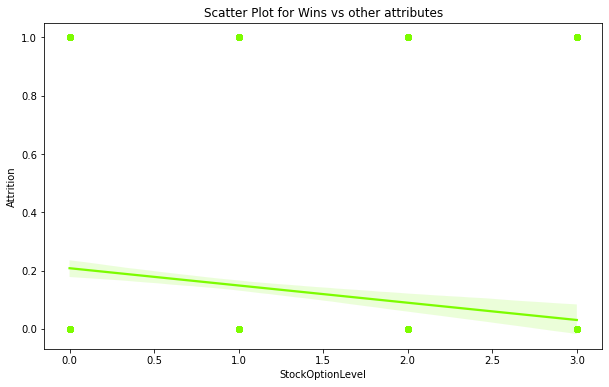

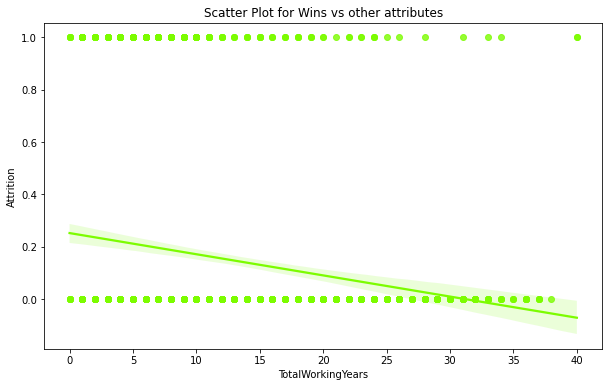

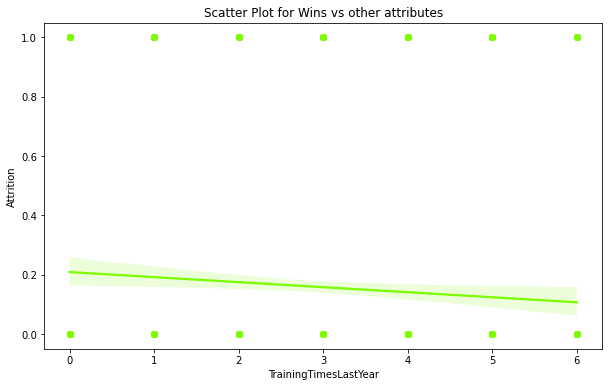

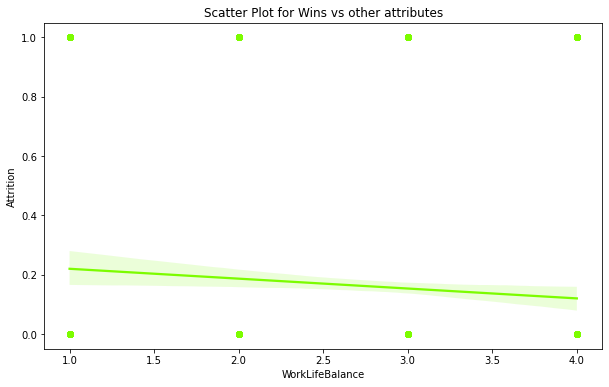

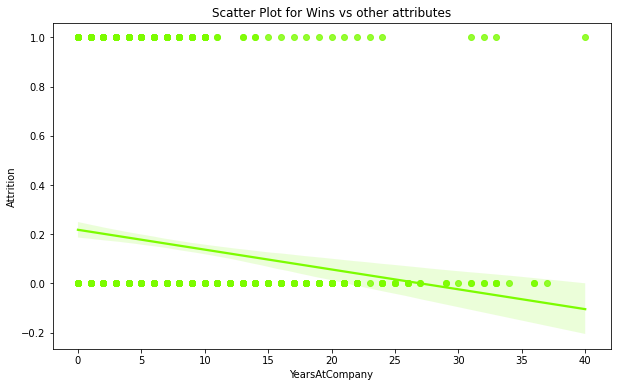

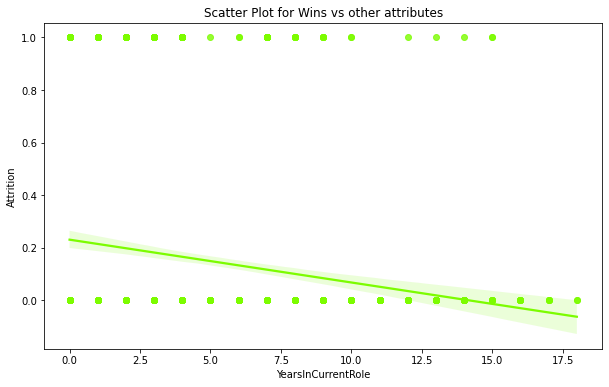

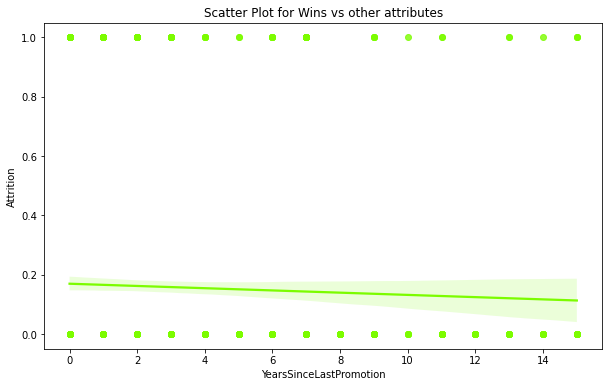

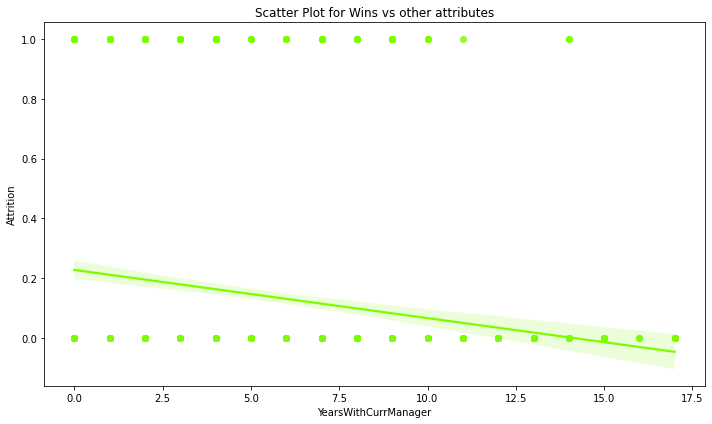

In [53]:
# Correlation analysis with scatterplot

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['Attrition'], color= 'lawngreen')
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Attrition')
        
plt.tight_layout()

In [54]:
# there are diverse correlation between the features

In [55]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

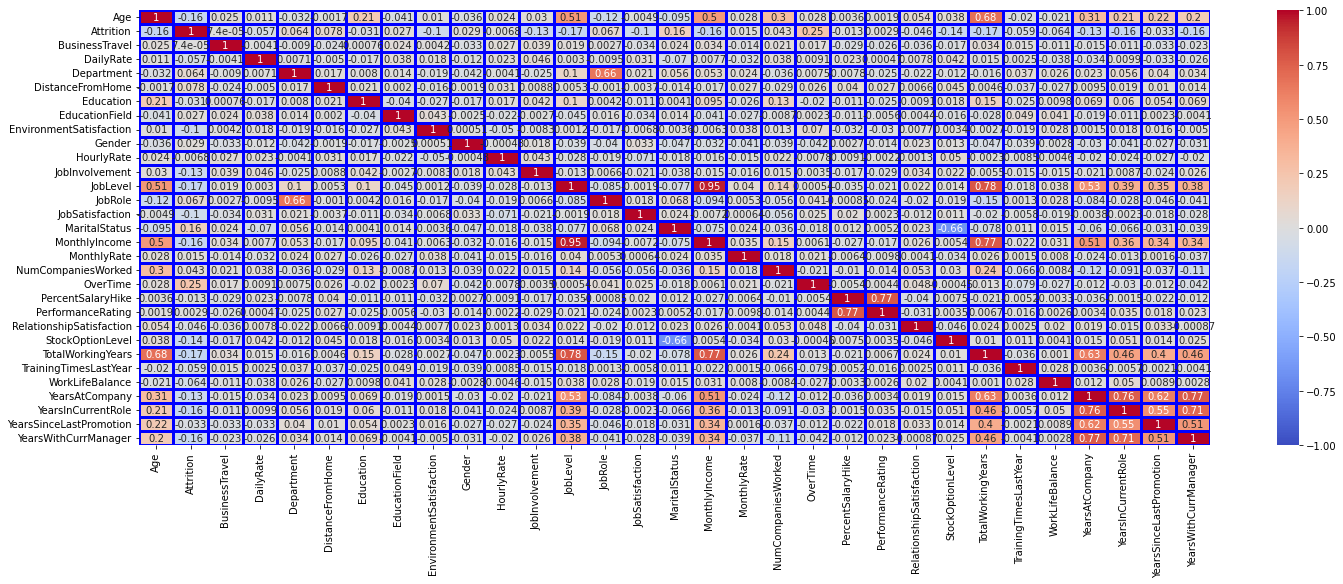

In [56]:
#let us make a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')

In [57]:
# let us now check for the skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [58]:
# skewness is present!

In [59]:
# let us work for the outliers

In [60]:
# Using Z Score to remove outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [61]:
df= df[(z<3).all(axis=1)]
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [62]:
# now again check the boxplot

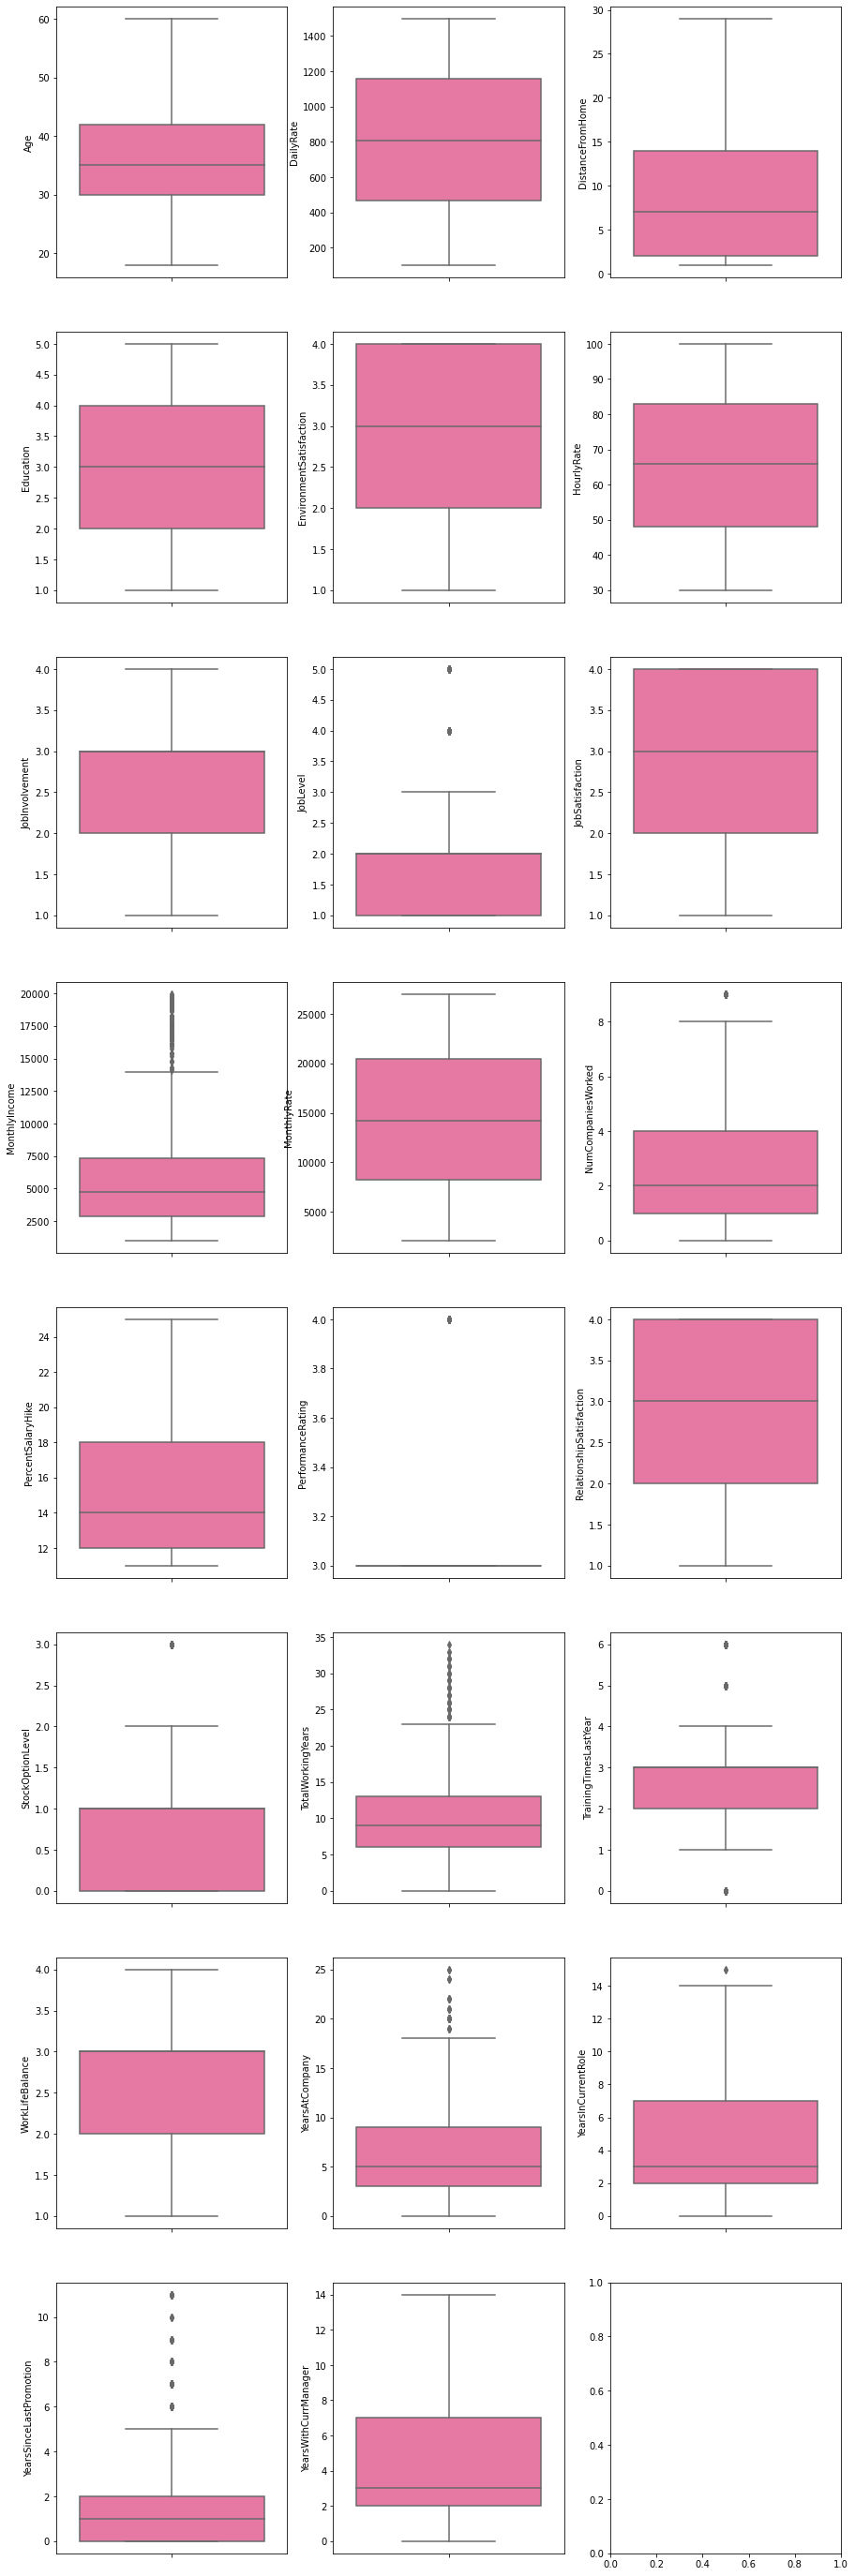

In [63]:
# Boxplot

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [64]:
# In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. 
# There are still presence of outliers but since they are in continous format we shall ignore it

In [65]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [66]:
# Using Log Transform to fix skewness

In [67]:
for col in integer_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [68]:
# Log Transformation has been applied on our numerical integer datatype columns

In [69]:
# now let's check the skewness again

In [70]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
Y

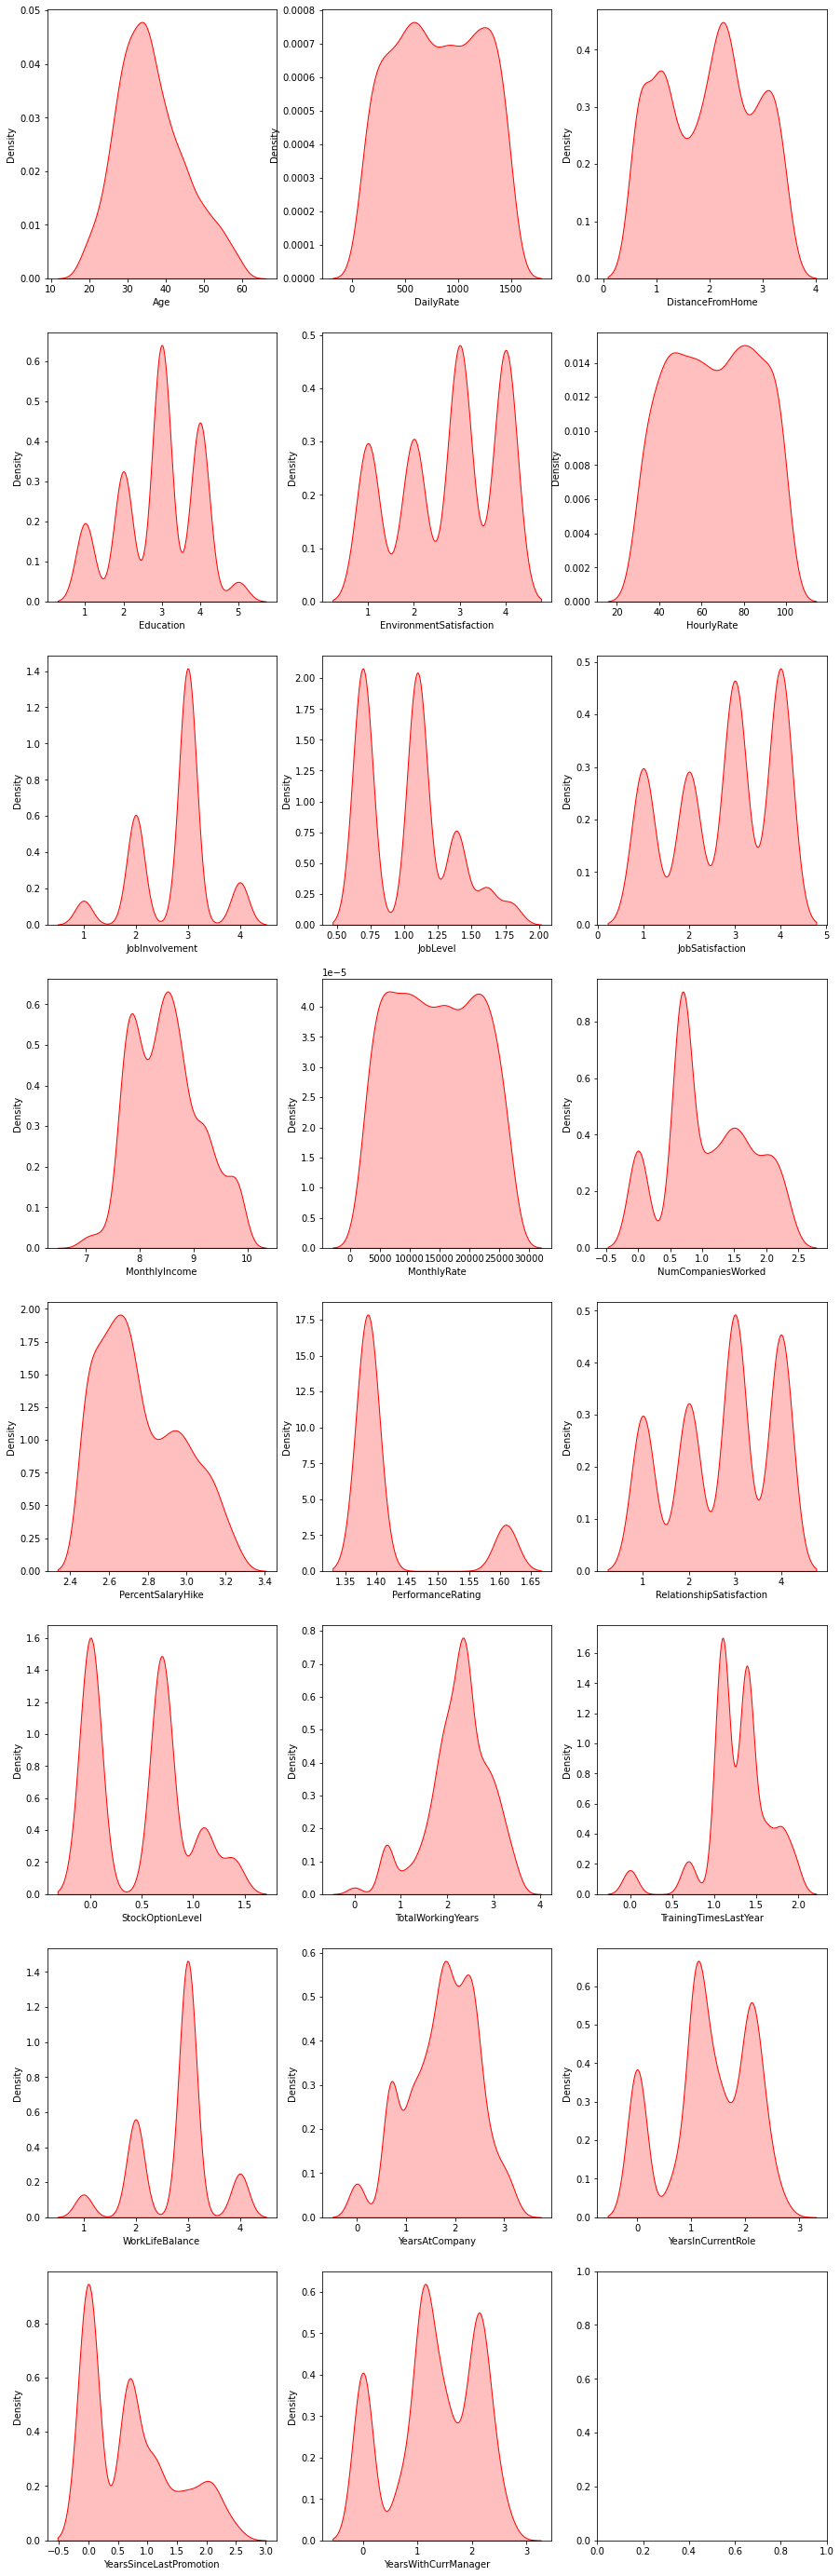

In [71]:
# visualize the skewness

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [72]:
# mostly the skewness is gone!

In [73]:
# Train-Test split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [74]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,0.693147,2,1.0,2,0.0,94,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1.0,279,1.0,2.197225,1,1.0,3,1.0,61,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2.0,1373,1.0,1.098612,2,4.0,4,1.0,92,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1.0,1392,1.0,1.386294,4,1.0,4,0.0,56,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2.0,591,1.0,1.098612,1,3.0,1,1.0,40,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,3.178054,2,3.0,3,1.0,41,...,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2.0,613,1.0,1.945910,1,3.0,4,1.0,42,...,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2.0,155,1.0,1.609438,3,1.0,2,1.0,87,...,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1.0,1023,2.0,1.098612,3,3.0,4,1.0,63,...,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [75]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [76]:
# check class imbalance

In [77]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [78]:
# This indicates class imbalance that needed to be fixed by using the oversampling method

In [79]:
# Synthetic Minority Over-sampling Technique (SMOTE)

In [80]:
!pip install imblearn

In [81]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [82]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [83]:
# class imbalance problem is solved!

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.694242,0.660003,0.812352,1.397135,-1.683908,-0.766593,-1.018459,-0.426504,-1.361364,1.516364,...,-0.474362,-1.404279,-0.929370,0.167811,-3.418705,-2.153198,0.512297,0.579996,-0.983192,0.846325
1,1.613481,-0.998577,-1.285964,-0.581904,0.209945,-1.804249,-1.018459,0.501864,0.853315,-0.254233,...,2.456908,1.431214,0.687061,0.461693,0.389469,0.554080,1.167540,1.210314,0.019054,1.221362
2,0.234622,0.660003,1.503291,-0.581904,-1.173368,-0.766593,1.338768,1.430233,0.853315,1.409055,...,-0.474362,-0.459115,-0.929370,-0.004682,0.389469,0.554080,-2.308688,-1.578406,-0.983192,-1.489503
3,-0.224997,-0.998577,1.551734,-0.581904,-0.811134,1.308719,-1.018459,1.430233,-1.361364,-0.522506,...,-0.474362,0.486050,-0.929370,0.167811,0.389469,0.554080,0.876628,1.210314,1.021300,-1.489503
4,-0.914427,0.660003,-0.490491,-0.581904,-1.173368,-1.804249,0.553025,-1.354873,0.853315,-1.380977,...,-0.474362,1.431214,0.687061,-0.200239,0.389469,0.554080,-0.716030,-0.105067,0.605330,-0.057296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,0.234622,0.660003,-1.273216,0.412229,-0.199024,0.271063,-0.623757,-1.354873,0.853315,0.014039,...,0.984440,0.486050,-0.929370,-0.176823,-0.007507,-0.799559,0.372977,-0.177545,0.522513,-0.050619
2312,-0.569712,-0.582779,-1.206926,-0.581904,-0.519395,-0.766593,-1.018459,-1.354873,-0.806154,-0.576160,...,-0.474362,-1.404279,-0.929370,0.018947,0.076548,-0.799559,-0.560410,-0.881872,-0.983192,-0.135327
2313,-0.684617,-0.801840,-0.442048,-2.326193,0.088827,0.271063,-1.524592,-0.426504,-1.098663,0.121348,...,-0.474362,0.486050,0.687061,-0.200239,-2.834867,-0.799559,-0.063328,-0.105067,-0.099830,-0.057296
2314,-0.110092,0.026587,1.327369,1.397135,-0.169455,1.308719,-0.532794,-0.426504,0.007523,0.711547,...,-0.474362,-1.404279,1.068854,0.289960,0.087664,0.554080,-0.556757,-0.105067,0.605330,-0.057296


In [85]:
# modelling and train and test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()

In [86]:
# LogisticRegression

In [87]:
#best random state for logistic regression.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8599137931034483 random_state 1
max_accuracy 0.8599137931034483 max_random_state 1
accuracy 0.8297413793103449 random_state 2
accuracy 0.8297413793103449 random_state 3
accuracy 0.8211206896551724 random_state 4
accuracy 0.8254310344827587 random_state 5
accuracy 0.8383620689655172 random_state 6
accuracy 0.834051724137931 random_state 7
accuracy 0.853448275862069 random_state 8
accuracy 0.8469827586206896 random_state 9
accuracy 0.8491379310344828 random_state 10
accuracy 0.8448275862068966 random_state 11
accuracy 0.8642241379310345 random_state 12
max_accuracy 0.8642241379310345 max_random_state 12
accuracy 0.8405172413793104 random_state 13
accuracy 0.8383620689655172 random_state 14
accuracy 0.8599137931034483 random_state 15
accuracy 0.8448275862068966 random_state 16
accuracy 0.8469827586206896 random_state 17
accuracy 0.8362068965517241 random_state 18
accuracy 0.8383620689655172 random_state 19
accuracy 0.8168103448275862 random_state 20
accuracy 0.8469827586206896 

In [88]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8900862068965517 on random_state 181


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

# Training the model
lr.fit(X_train, y_train)
    
# Predicting Y_test
pred = lr.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 86.63793103448276

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       243
           1       0.87      0.84      0.86       221

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464

Cross Validation Score: 84.50296045281895

Accuracy Score - Cross Validation Score is 2.134970581663808


In [90]:
# DecisionTreeClassifier

In [91]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8599137931034483 random_state 1
max_accuracy 0.8599137931034483 max_random_state 1
accuracy 0.8556034482758621 random_state 2
accuracy 0.8512931034482759 random_state 3
accuracy 0.8405172413793104 random_state 4
accuracy 0.8491379310344828 random_state 5
accuracy 0.8620689655172413 random_state 6
max_accuracy 0.8620689655172413 max_random_state 6
accuracy 0.8491379310344828 random_state 7
accuracy 0.8599137931034483 random_state 8
accuracy 0.8060344827586207 random_state 9
accuracy 0.8491379310344828 random_state 10
accuracy 0.8491379310344828 random_state 11
accuracy 0.8512931034482759 random_state 12
accuracy 0.8232758620689655 random_state 13
accuracy 0.8275862068965517 random_state 14
accuracy 0.853448275862069 random_state 15
accuracy 0.8448275862068966 random_state 16
accuracy 0.8512931034482759 random_state 17
accuracy 0.8642241379310345 random_state 18
max_accuracy 0.8642241379310345 max_random_state 18
accuracy 0.8491379310344828 random_state 19
accuracy 0.831896551

In [92]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8900862068965517 on random_state 118


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 168)

# Training the model
dt.fit(X_train, y_train)
    
# Predicting Y_test
pred = dt.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(dt, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 85.5603448275862

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       238
           1       0.82      0.89      0.86       226

    accuracy                           0.86       464
   macro avg       0.86      0.86      0.86       464
weighted avg       0.86      0.86      0.86       464

Cross Validation Score: 83.340470693379

Accuracy Score - Cross Validation Score is 2.2198741342072026


In [94]:
# RandomForestClassifier

In [95]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9288793103448276 random_state 1
max_accuracy 0.9288793103448276 max_random_state 1
accuracy 0.9310344827586207 random_state 2
max_accuracy 0.9310344827586207 max_random_state 2
accuracy 0.9267241379310345 random_state 3
accuracy 0.9310344827586207 random_state 4
accuracy 0.9051724137931034 random_state 5
accuracy 0.9310344827586207 random_state 6
accuracy 0.9267241379310345 random_state 7
accuracy 0.9202586206896551 random_state 8
accuracy 0.9181034482758621 random_state 9
accuracy 0.9245689655172413 random_state 10
accuracy 0.9137931034482759 random_state 11
accuracy 0.9245689655172413 random_state 12
accuracy 0.9137931034482759 random_state 13
accuracy 0.9202586206896551 random_state 14
accuracy 0.9353448275862069 random_state 15
max_accuracy 0.9353448275862069 max_random_state 15
accuracy 0.9396551724137931 random_state 16
max_accuracy 0.9396551724137931 max_random_state 16
accuracy 0.8987068965517241 random_state 17
accuracy 0.9094827586206896 random_state 18
accuracy 0.

In [96]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9612068965517241 on random_state 160


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 117)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 94.39655172413794

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       235
           1       0.97      0.91      0.94       229

    accuracy                           0.94       464
   macro avg       0.95      0.94      0.94       464
weighted avg       0.95      0.94      0.94       464

Cross Validation Score: 90.7718589409399

Accuracy Score - Cross Validation Score is 3.624692783198043


In [98]:
# SVC

In [99]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= RandomForestClassifier()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.9331896551724138 random_state 1
max_accuracy 0.9331896551724138 max_random_state 1
accuracy 0.9288793103448276 random_state 2
accuracy 0.9353448275862069 random_state 3
max_accuracy 0.9353448275862069 max_random_state 3
accuracy 0.9202586206896551 random_state 4
accuracy 0.9030172413793104 random_state 5
accuracy 0.9331896551724138 random_state 6
accuracy 0.915948275862069 random_state 7
accuracy 0.9181034482758621 random_state 8
accuracy 0.9202586206896551 random_state 9
accuracy 0.9202586206896551 random_state 10
accuracy 0.9137931034482759 random_state 11
accuracy 0.9331896551724138 random_state 12
accuracy 0.9202586206896551 random_state 13
accuracy 0.915948275862069 random_state 14
accuracy 0.9418103448275862 random_state 15
max_accuracy 0.9418103448275862 max_random_state 15
accuracy 0.9375 random_state 16
accuracy 0.8943965517241379 random_state 17
accuracy 0.9137931034482759 random_state 18
accuracy 0.9181034482758621 random_state 19
accuracy 0.896551724137931 random

In [100]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.959051724137931 on random_state 160


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 160)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 95.47413793103449

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       234
           1       0.98      0.93      0.95       230

    accuracy                           0.95       464
   macro avg       0.96      0.95      0.95       464
weighted avg       0.96      0.95      0.95       464

Cross Validation Score: 91.07293140686676

Accuracy Score - Cross Validation Score is 4.401206524167733


In [102]:
# Let us now check the AUC and ROC

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

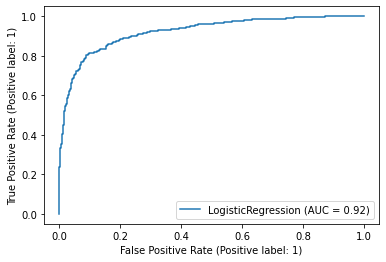

In [104]:
disp= plot_roc_curve(lr, X_train, y_train)

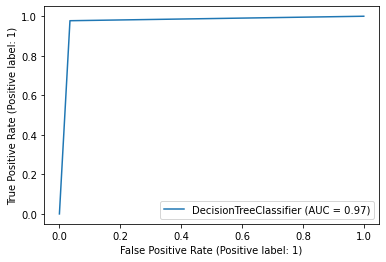

In [105]:
disp= plot_roc_curve(dt, X_train, y_train)

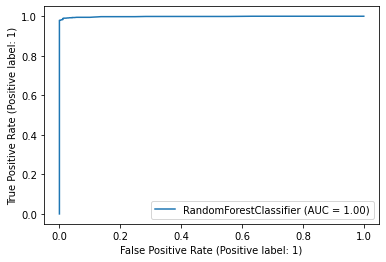

In [106]:
disp= plot_roc_curve(rf, X_train, y_train)

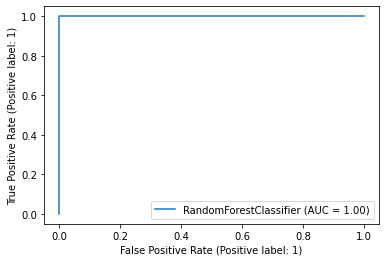

In [107]:
disp= plot_roc_curve(svc, X_train, y_train)

In [108]:
# considering all the above models, we can conclude Support Vector Classifier is the best model for our problem.
# Let us proceed with this model...

In [109]:
# SVC

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 160)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 95.6896551724138

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       234
           1       0.99      0.93      0.96       230

    accuracy                           0.96       464
   macro avg       0.96      0.96      0.96       464
weighted avg       0.96      0.96      0.96       464

Cross Validation Score: 91.24599687197437

Accuracy Score - Cross Validation Score is 4.443658300439424


In [110]:
# check train and test score
y_pred= svc.predict(X_train)
pred= svc.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [111]:
train_result

100.0

In [112]:
test_result

95.6896551724138

In [113]:
#Hyperparameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

svc2= SVC()

svcgrid=GridSearchCV(svc2,param_grid=params,cv=4)
svcgrid.fit(X_train,y_train)  
      
print(svcgrid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [116]:
svc2= SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
svc2.score(X_train, y_train)
pred_decision= svc2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 97.62931034482759

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       234
           1       0.98      0.97      0.98       230

    accuracy                           0.98       464
   macro avg       0.98      0.98      0.98       464
weighted avg       0.98      0.98      0.98       464

Cross Validation Score: 96.7216243390184

Accuracy Score - Cross Validation Score is 0.9076860058091825


In [ ]:
# accuracy and performance has been improved! 

In [118]:
import pickle
filename= 'churn.pkl'
pickle.dump(svc2, open(filename, 'wb'))

In [119]:
[]

[]

In [120]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

97.62931034482759


In [121]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [122]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
Predicted,1,0,0,1,1,0,0,1,1,1,...,0,1,0,1,1,1,1,0,1,1
Original,1,0,0,1,1,0,0,1,1,1,...,0,1,0,1,1,1,1,0,1,1
